In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.stattools import kpss

# Data Explore

In [2]:
da = pd.read_csv("data.csv")

In [3]:
da.head()

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100


## Stock selection based on data sufficiency

In [4]:
da["ticker"].unique()

array(['1332 JT', '1333 JT', '1334 JT', '1605 JT', '1721 JT', '1801 JT',
       '1802 JT', '1803 JT', '1808 JT', '1812 JT', '1925 JT', '1928 JT',
       '1963 JT', '2002 JT', '2269 JT', '2282 JT', '2413 JT', '2432 JT',
       '2501 JT', '2502 JT', '2503 JT', '2531 JT', '2768 JT', '2801 JT',
       '2802 JT', '2871 JT', '2914 JT', '3086 JT', '3099 JT', '3101 JT',
       '3103 JT', '3105 JT', '3110 JT', '3289 JT', '3382 JT', '3401 JT',
       '3402 JT', '3405 JT', '3407 JT', '3436 JT', '3659 JT', '3861 JT',
       '3863 JT', '3864 JT', '3865 JT', '3893 JT', '4004 JT', '4005 JT',
       '4021 JT', '4041 JT', '4042 JT', '4043 JT', '4061 JT', '4063 JT',
       '4151 JT', '4183 JT', '4188 JT', '4208 JT', '4272 JT', '4324 JT',
       '4452 JT', '4502 JT', '4503 JT', '4506 JT', '4507 JT', '4519 JT',
       '4523 JT', '4543 JT', '4568 JT', '4578 JT', '4631 JT', '4689 JT',
       '4704 JT', '4751 JT', '4755 JT', '4901 JT', '4902 JT', '4911 JT',
       '5002 JT', '5019 JT', '5020 JT', '5101 JT', 

In [5]:
da[da["ticker"]=='1333 JT']

,ticker,date,last,volume
2005,1333 JT,2014-04-02,1590.8200,672700
2006,1333 JT,2014-04-03,1587.1354,471300
2007,1333 JT,2014-04-04,1580.6874,132900
2008,1333 JT,2014-04-07,1553.9741,150400
2009,1333 JT,2014-04-08,1553.0530,191900
...,...,...,...,...
3701,1333 JT,2021-03-15,2718.0000,191100
3702,1333 JT,2021-03-16,2713.0000,151100
3703,1333 JT,2021-03-17,2732.0000,169400
3704,1333 JT,2021-03-18,2740.0000,155300


In [6]:
da[da["ticker"]=="1332 JT"]

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100
...,...,...,...,...
2000,1332 JT,2021-03-15,560.0000,1537500
2001,1332 JT,2021-03-16,559.0000,1594200
2002,1332 JT,2021-03-17,561.0000,1328200
2003,1332 JT,2021-03-18,565.0000,1421200


It seems that the date ranges for different stocks are different.

In [7]:
stocks = da["ticker"].unique()
stock_date = pd.DataFrame(index=stocks, columns=["begin", "end"])

for i in stock_date.index:
    stock_data = da[da["ticker"]==i]
    stock_date.loc[i, "begin"] = stock_data["date"].iloc[0]
    stock_date.loc[i, "end"] = stock_data["date"].iloc[-1]

In [8]:
stock_date

,begin,end
1332 JT,2013-01-04,2021-03-19
1333 JT,2014-04-02,2021-03-19
1334 JT,2013-01-04,2014-03-26
1605 JT,2013-01-04,2021-03-19
1721 JT,2013-01-04,2021-03-19
...,...,...
9681 JT,2013-01-04,2019-09-30
9735 JT,2013-01-04,2021-03-19
9766 JT,2013-01-04,2021-03-19
9983 JT,2013-01-04,2021-03-19


In [9]:
print(stock_date["begin"].unique())
print(stock_date["end"].unique())

['2013-01-04' '2014-04-02' '2015-10-01' '2019-10-01' '2013-10-02'
 '2020-10-29' '2013-04-02' '2017-01-24' '2018-12-26' '2018-10-01'
 '2016-10-03' '2019-03-27' '2017-10-02' '2019-03-18' '2017-08-01'
 '2013-09-26' '2016-04-04' '2016-08-01' '2019-08-01' '2016-08-29'
 '2020-07-29' '2020-10-02']
['2021-03-19' '2014-03-26' '2015-09-30' '2013-10-01' '2017-09-29'
 '2013-03-26' '2016-09-30' '2020-09-30' '2019-03-26' '2018-12-25'
 '2018-09-28' '2019-07-31' '2017-07-31' '2017-01-23' '2019-03-15'
 '2020-10-28' '2016-08-26' '2016-03-28' '2020-07-28' '2013-09-25'
 '2020-12-01' '2019-09-30']


Here, we only select stocks with sufficient data, which means the date range begins at 2013-01-04 and ends at 2021-03-19.

In [10]:
stock_select = stock_date[(stock_date["begin"]=="2013-01-04") & (stock_date["end"]=="2021-03-19")]

stock_select

,begin,end
1332 JT,2013-01-04,2021-03-19
1605 JT,2013-01-04,2021-03-19
1721 JT,2013-01-04,2021-03-19
1801 JT,2013-01-04,2021-03-19
1802 JT,2013-01-04,2021-03-19
...,...,...
9613 JT,2013-01-04,2021-03-19
9735 JT,2013-01-04,2021-03-19
9766 JT,2013-01-04,2021-03-19
9983 JT,2013-01-04,2021-03-19


In [11]:
data = da[da["ticker"].isin(stock_select.index)].reset_index(drop=True).copy()

In [12]:
data

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100
...,...,...,...,...
405953,9984 JT,2021-03-15,10370.0000,12041200
405954,9984 JT,2021-03-16,10620.0000,11346000
405955,9984 JT,2021-03-17,10400.0000,9771000
405956,9984 JT,2021-03-18,10220.0000,13941600


## Missing values

In [13]:
print(data.isnull().sum())

ticker    0
date      0
last      0
volume    0
dtype: int64


## Duplicated Data

In [14]:
duplicates = data[data.duplicated(subset=['ticker', 'date'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [ticker, date, last, volume]
Index: []


## Types of Data

In [15]:
print("data:")
print(data.dtypes)

data:
ticker     object
date       object
last      float64
volume      int64
dtype: object


In [16]:
data["date"] = pd.to_datetime(data["date"])
data

,ticker,date,last,volume
0,1332 JT,2013-01-04,169.0987,1464100
1,1332 JT,2013-01-07,166.3266,1783500
2,1332 JT,2013-01-08,166.3266,1759800
3,1332 JT,2013-01-09,165.4026,767800
4,1332 JT,2013-01-10,167.2507,1503100
...,...,...,...,...
405953,9984 JT,2021-03-15,10370.0000,12041200
405954,9984 JT,2021-03-16,10620.0000,11346000
405955,9984 JT,2021-03-17,10400.0000,9771000
405956,9984 JT,2021-03-18,10220.0000,13941600


## Outliers

Here, if the stock price is less than $mean-3*std$ or larger than $mean+3*std$, we identify it as an outlier. The mean value and standard deviation is calculated using the rolling window method.

In [17]:
unique_stocks = data["ticker"].unique()

data.set_index("date", inplace=True)

In [18]:
data.sort_index(inplace=True)

In [19]:
outlier_index = []
window = 10
threshold = 3

for i in unique_stocks:
    sub_data = data[data["ticker"] == i].copy()
    sub_data_de = sub_data.sort_index(ascending = False).copy()
    
    sub_data['MovingAverage'] = sub_data['last'].rolling(window=window, min_periods=1).mean()
    sub_data['MovingStd'] = sub_data['last'].rolling(window=window, min_periods=1).std()
    
    sub_data_de['MovingAverage'] = sub_data_de['last'].rolling(window=window, min_periods=1).mean()
    sub_data_de['MovingStd'] = sub_data_de['last'].rolling(window=window, min_periods=1).std()
    
    sub_data['Deviation'] = abs(sub_data['last'] - sub_data['MovingAverage'])
    sub_data_de['Deviation'] = abs(sub_data_de['last'] - sub_data_de['MovingAverage'])
    
    sub_data['IsOutlier'] = sub_data['Deviation'] > (threshold * sub_data['MovingStd'])
    sub_data_de['IsOutlier'] = sub_data_de['Deviation'] > (threshold * sub_data_de['MovingStd'])
    
    if sum(sub_data['IsOutlier'] & sub_data_de["IsOutlier"]) >0 :
        outliers = sub_data[sub_data['IsOutlier'] & sub_data_de["IsOutlier"]]
        outlier_index.append(outliers.index)

In [20]:
outlier_index

[]

# Strategy

Here, we would like to build a strategy using the idea of pair trading, which utilizes the price changes of a pair of stocks with strong correlation.

In [21]:
# We use the data from 2013 to 2018 to select the stock pairs
# use the data from 2019 to get the strategy accuracy

da_train = data["2013":"2019"]
da_test = data["2019":]

## Pair Selection

We select stocks with high correlation coefficient, which can also pass both the augmented DickeyFuller test and the cointegration test.

In [22]:
stocks = data["ticker"].unique()

In [23]:
def stock_selection():
    length = len(stocks)
    stock_correlation = []
    for i in range(length):
        for j in range(i+1, length):
            stock_1 = da_train[da_train["ticker"] == stocks[i]]
            stock_2 = da_train[da_train["ticker"] == stocks[j]]
            da = pd.merge(stock_1, stock_2, on = "date", how='inner')
            if (len(da) !=0):
                if (abs(np.corrcoef(da["last_x"], da["last_y"])[0, 1]) > 0.9):
                    stock_correlation.append([np.corrcoef(da["last_x"], da["last_y"])[0, 1], [stocks[i], stocks[j]]])
    
    stock_correlation = np.array(stock_correlation, dtype=object)
    if len(stock_correlation) > 1:
        sorted_indices = np.argsort(stock_correlation[:, 0], axis=0)[::-1]
        stock_correlation = stock_correlation[sorted_indices]
    return stock_correlation

In [24]:
correlation = stock_selection()

In [25]:
def cointegration_select():
    result = []
    for j in correlation:
        stock_1 = da_train[da_train["ticker"] == j[1][0]]
        stock_2 = da_train[da_train["ticker"] == j[1][1]]
        data = pd.merge(stock_1, stock_2, on = "date", how = "inner")
            
        model = LinearRegression()
        X = np.array(data["last_x"]).reshape(-1,1)
        y = data['last_y']
        model.fit(X, y)

        predicted_values = model.predict(X)
        residuals = y - predicted_values
        test = adfuller(residuals)
            
        coint_test = coint(X, y)
        if test[1] < 0.05:  # Augmented Dickey-Fuller test 
            if coint_test[1] < 0.05: # Cointegration test
                result.append(list(j))
                break
    return result

In [26]:
pair_selected = cointegration_select()

In [27]:
pair_selected

[[0.9820416104448255, ['5301 JT', '4004 JT']]]

## Signal check

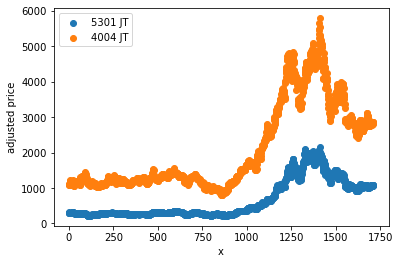

In [28]:
plt.scatter(range(len(da_train[da_train["ticker"]=='5301 JT']["last"])),da_train[da_train["ticker"] == '5301 JT']["last"], label = '5301 JT')
plt.scatter(range(len(da_train[da_train["ticker"]=='4004 JT']["last"])),da_train[da_train["ticker"] == '4004 JT']["last"], label = '4004 JT')

plt.xlabel("x")
plt.ylabel("adjusted price")
plt.legend()
plt.savefig("pair1.png")
plt.show()

From the above picture, we can find that the price movements of these two stocks are closely related.

## Strategy Costruction

We then begin to construct our portfolio using the two stocks selected. The logic is that the spread of these two stocks will converge to its mean in the long run. Thus, we can make profits by exploiting the changes in the spreads.


If the spread is larger than a certain threshold, we buy the stock at a lower price and short-sell the stock at a higher price. We close the position once the spread converges to a certain threshold. If the spread is smaller than a certain threshold, we buy the stock at a lower price and short-sell the stock at a higher price. We close the position once the spread converges to a certain threshold.


We also employ some risk management methods. Firstly, if the loss meets certain criteria, we close the position. Secondly, the number of shares we buy in each trade is less than a certain fraction of the initial capital.

In [29]:
def pair_trading_strategy(da, threshold_buy = 1, threshold_buy_sell = 0, threshold_sell = -1, threshold_sell_buy=0, 
                          stop_loss_percent = 0.9):
    initial_capital = 1000000
    number = int(initial_capital*0.1/np.mean(da["last_x"]))

    # Initialize position and cash
    position_stock1 = 0
    position_stock2 = 0
    cash = [initial_capital]
    
    portfolio_values = [initial_capital]
    for i in range(len(da["z_score"])):
        if da.iloc[i]["z_score"] >= threshold_buy:
            if (position_stock1 == 0):
                position_stock1 -= number
                position_stock2 += number
                cash.append(cash[-1] + number*da.iloc[i]["last_x"] - number*da.iloc[i]["last_y"])
                
        if da.iloc[i]["z_score"] > threshold_sell_buy:
            if (position_stock1 == number):
                position_stock1 -= number
                position_stock2 += number
                cash.append(cash[-1] + number*da.iloc[i]["last_x"] - number*da.iloc[i]["last_y"])
                
        if da.iloc[i]["z_score"] <= threshold_sell:
            if (position_stock2 == 0):
                position_stock1 += number
                position_stock2 -= number
                cash.append(cash[-1] - number*da.iloc[i]["last_x"] + number*da.iloc[i]["last_y"])
                
        if da.iloc[i]["z_score"] < threshold_buy_sell:
            if (position_stock1 == -number):
                position_stock1 += number
                position_stock2 -= number
                cash.append(cash[-1] - number*da.iloc[i]["last_x"] + number*da.iloc[i]["last_y"])
                
        portfolio_values.append(cash[-1] + position_stock1*da.iloc[i]["last_x"] 
                                        +position_stock2*da.iloc[i]["last_y"])
        
        # Risk Management
        if (portfolio_values[-1]/portfolio_values[0] < stop_loss_percent) | (cash[-1]/cash[0] < stop_loss_percent):
            position_stock1 == 0
            position_stock2 == 0
            cash.append(cash[-1] + position_stock1*da.iloc[i]["last_x"] + position_stock2*da.iloc[i]["last_y"])       
        
        
    if position_stock1 !=0 | position_stock2 !=0:
        cash = cash + position_stock1 * da.iloc[-1]["last_x"] + position_stock2 * da.iloc[-1]["last_y"]
        
    portfolio_values.append(cash[-1] + position_stock1*da.iloc[i]["last_x"] 
                                        +position_stock2*da.iloc[i]["last_y"])
    return cash, portfolio_values

## Backtest

We first try to figure out the strategy performance on the training set, and fine tune the hyper-parameters using grid search.

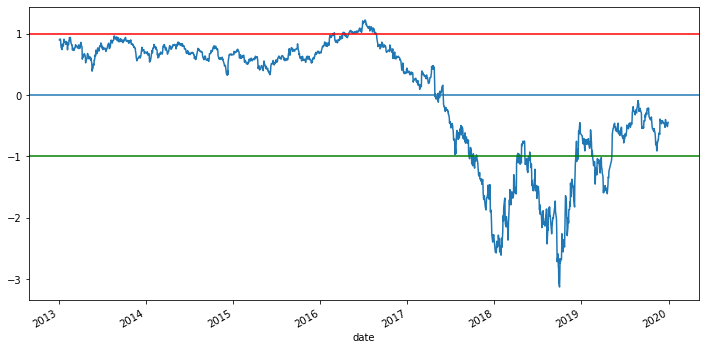

In [30]:
stock_1 = da_train[da_train["ticker"] == '5301 JT']
stock_2 = da_train[da_train["ticker"] == '4004 JT']
stock = pd.merge(stock_1, stock_2, on = "date", how = "inner")
stock["spread"] = stock["last_x"]-stock["last_y"] 
    
    
def zscore(series):
    return (series - series.mean()) / np.std(series)

stock["z_score"] = zscore(stock["spread"])
stock["z_score"].plot(figsize=(12,6))
plt.axhline(0)
plt.axhline(1, color='red')
plt.axhline(-1, color='green')
plt.show()

In [31]:
cash, portfolio_values = pair_trading_strategy(da = stock, stop_loss_percent = 0.8, threshold_buy = 0.5,
                                              threshold_buy_sell=0.2, threshold_sell = -0.5, threshold_sell_buy= -0.2)
print((portfolio_values[-1]-portfolio_values[0])/portfolio_values[0])
cash, portfolio_values = pair_trading_strategy(da = stock, stop_loss_percent = 0.8)
print((portfolio_values[-1]-portfolio_values[0])/portfolio_values[0])
cash, portfolio_values = pair_trading_strategy(da = stock, stop_loss_percent = 0.8, threshold_buy = 0.4,
                                              threshold_buy_sell=0, threshold_sell = -0.4, threshold_sell_buy= 0)
print((portfolio_values[-1]-portfolio_values[0])/portfolio_values[0])
cash, portfolio_values = pair_trading_strategy(da = stock, stop_loss_percent = 0.8, threshold_buy = 0.5,
                                              threshold_buy_sell=0.1, threshold_sell = -0.5, threshold_sell_buy= -0.1)
print((portfolio_values[-1]-portfolio_values[0])/portfolio_values[0])

-89.8150451364001
-0.09105311519999977
-0.16622505989999964
-0.12180954239999957


We can find the highest return is achieved using the second group of hyper-parameters. Therefore, we use the second group of hyper-parameters to obtain the pnl on the test set.

In [32]:
stock_1 = da_test[da_test["ticker"] == '5301 JT']
stock_2 = da_test[da_test["ticker"] == '4004 JT']
stock = pd.merge(stock_1, stock_2, on = "date", how = "inner")
stock["spread"] = stock["last_x"]-stock["last_y"] 
    
    
def zscore(series):
    return (series - series.mean()) / np.std(series)

stock["z_score"] = zscore(stock["spread"])

In [33]:
cash, portfolio_values = pair_trading_strategy(da = stock, stop_loss_percent = 0.8)
print((portfolio_values[-1]-portfolio_values[0])/portfolio_values[0])

0.3112242067999998


The strategy achieves a small portfolio value increase in the testing set

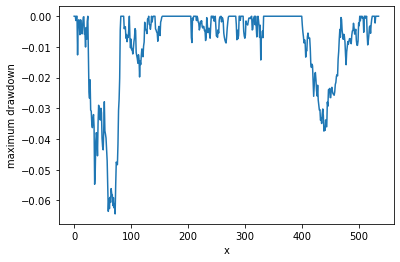

Maximum Drawdown: 6.44%


In [34]:
# maximum drawdown calculation

def maximum_drawdown(portfolio_values):
    portfolio_values = pd.Series(portfolio_values)
    # Calculate the daily returns
    daily_returns = portfolio_values.pct_change().dropna()

    # Calculate the cumulative returns
    cumulative_returns = (1 + daily_returns).cumprod()

    # Calculate the previous peaks
    previous_peaks = np.maximum.accumulate(cumulative_returns)

    # Calculate the drawdowns
    drawdowns = (cumulative_returns - previous_peaks) / previous_peaks
    
    plt.plot(range(len(drawdowns)), drawdowns)
    plt.xlabel("x")
    plt.ylabel("maximum drawdown")
    plt.savefig("drawdown.png")
    plt.show()

    # Calculate the maximum drawdown
    max_drawdown = np.abs(np.min(drawdowns))

    return max_drawdown

max_drawdown = maximum_drawdown(portfolio_values)
print("Maximum Drawdown: {:.2f}%".format(max_drawdown * 100))

In [35]:
# Calculate the Sharpe Ratio

def sharpe_ratio(portfolio_values, risk_free_rate=0.0):
    # Convert numpy array to pandas Series
    portfolio_values = pd.Series(portfolio_values)

    # Calculate the daily returns
    daily_returns = portfolio_values.pct_change().dropna()

    # Calculate the average daily return and standard deviation of daily returns
    avg_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()

    # Calculate the Sharpe ratio
    sharpe_ratio = (avg_daily_return - risk_free_rate) / std_daily_return

    return sharpe_ratio

In [36]:
sharpe_ratio_value = sharpe_ratio(portfolio_values)
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio_value))

Sharpe Ratio: 0.09
